<a href="https://colab.research.google.com/github/Habeebah157/Deep-Learing/blob/main/First_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi


Fri Jul 11 16:52:54 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   56C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install fastbook


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 102.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 84.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu1

In [ ]:
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [ ]:
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
from fastdownload import download_url
from PIL import Image
from pathlib import Path


In [ ]:
!pip uninstall -y duckduckgo_search
!pip install duckduckgo_search


import duckduckgo_search
print(duckduckgo_search.__file__)

with open(duckduckgo_search.__file__, 'r') as f:
    for _ in range(10):
        print(f.readline().strip())



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 33.9 MB/s eta 0:00:00
/usr/local/lib/python3.11/dist-packages/duckduckgo_search/__init__.py
"""Duckduckgo_search.

Search for words, documents, images, videos, news, maps and text translation
using the DuckDuckGo.com search engine.
"""

import logging

from .duckduckgo_search import DDGS
from .version import __version__


In [ ]:
# !pip install duckduckgo_search
# from duckduckgo_search import DDGS
# !pip install ddgs
# !pip uninstall duckduckgo_search -y

# from ddgs import DDGS


# try:
#     with DDGS() as ddgs:
#         results = ddgs.images('dogs', max_results=3, timeout=10)
#         for r in results:
#             print(r['image'])
# except Exception as e:
#     print(f"Error: {e}")
# import requests
# try:
#     r = requests.get('https://duckduckgo.com', timeout=5)
#     print("DuckDuckGo reachable:", r.status_code)
# except Exception as e:
#     print("Network error:", e)




# with DDGS() as ddgs:
#     results = ddgs.images('dogs', max_results=10)
#     print(f"Found {len(results)} images")
#     print(results[0])  # print first result details

In [ ]:
import os
import requests
from urllib.parse import urlencode

PEXELS_API_KEY = "NoQl7iJebcF5mYXFMrz9j3Ahcdx0KwJiI3ohnjSvSyHq0Tu4c4xWhtsk"
headers = {"Authorization": PEXELS_API_KEY}

query = "winter"
per_page = 80  # max allowed by Pexels
pages = 3
max_images = 200

save_dir = "./pexels_winter"
os.makedirs(save_dir, exist_ok=True)

print("Starting download from Pexels...")

image_count = 0

for page in range(1, pages + 1):
    params = {"query": query, "per_page": per_page, "page": page}
    url = f"https://api.pexels.com/v1/search?{urlencode(params)}"
    response = requests.get(url, headers=headers)

    if response.status_code != 200:
        print(f"API error: {response.status_code} - {response.text}")
        continue

    data = response.json()

    for photo in data.get("photos", []):
        if image_count >= max_images:
            break

        image_url = photo["src"]["large"]
        image_id = photo["id"]
        save_path = os.path.join(save_dir, f"{image_id}.jpg")

        img_response = requests.get(image_url)
        if img_response.status_code == 200:
            with open(save_path, "wb") as f:
                f.write(img_response.content)
            image_count += 1
            print(f"Downloaded {save_path}")
        else:
            print(f"Failed to download {image_url}, status: {img_response.status_code}")

    if image_count >= max_images:
        break

print(f"Download complete! {image_count} images saved to {save_dir}")


Starting download from Pexels...
Downloaded ./pexels_winter/688660.jpg
Downloaded ./pexels_winter/302743.jpg
Downloaded ./pexels_winter/639110.jpg
Downloaded ./pexels_winter/813872.jpg
Downloaded ./pexels_winter/1438761.jpg
Downloaded ./pexels_winter/54200.jpg
Downloaded ./pexels_winter/730256.jpg
Downloaded ./pexels_winter/64705.jpg
Downloaded ./pexels_winter/259620.jpg
Downloaded ./pexels_winter/66284.jpg
Downloaded ./pexels_winter/300857.jpg
Downloaded ./pexels_winter/789380.jpg
Downloaded ./pexels_winter/905248.jpg
Downloaded ./pexels_winter/997567.jpg
Downloaded ./pexels_winter/735987.jpg
Downloaded ./pexels_winter/259698.jpg
Downloaded ./pexels_winter/699380.jpg
Downloaded ./pexels_winter/1978126.jpg
Downloaded ./pexels_winter/869258.jpg
Downloaded ./pexels_winter/1366919.jpg
Downloaded ./pexels_winter/287222.jpg
Downloaded ./pexels_winter/1552212.jpg
Downloaded ./pexels_winter/572897.jpg
Downloaded ./pexels_winter/774664.jpg
Downloaded ./pexels_winter/789382.jpg
Downloaded ./pex

In [ ]:
import os

# Folder where Pexels images were saved
images_folder = "./pexels_winter"

result = []
max_images = 200

for root, dirs, files in os.walk(images_folder):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png', '.webp')):
            full_path = os.path.join(root, file)
            result.append(full_path)
            if len(result) >= max_images:
                break
    if len(result) >= max_images:
        break

print(f"\nCollected {len(result)} images.")
print("Sample paths:")
print(result[:5])  # Print first 5 image paths



Collected 200 images.
Sample paths:
['./pexels_winter/101529.jpg', './pexels_winter/640781.jpg', './pexels_winter/1724357.jpg', './pexels_winter/753728.jpg', './pexels_winter/302280.jpg']


In [ ]:
print(result)
# image = Image.open(destination)
# image.to_thumb(128,128)

['./pexels_winter/101529.jpg', './pexels_winter/640781.jpg', './pexels_winter/1724357.jpg', './pexels_winter/753728.jpg', './pexels_winter/302280.jpg', './pexels_winter/301469.jpg', './pexels_winter/753500.jpg', './pexels_winter/3151907.jpg', './pexels_winter/730614.jpg', './pexels_winter/351448.jpg', './pexels_winter/3462588.jpg', './pexels_winter/1552212.jpg', './pexels_winter/773953.jpg', './pexels_winter/287222.jpg', './pexels_winter/813872.jpg', './pexels_winter/997567.jpg', './pexels_winter/45212.jpg', './pexels_winter/1656564.jpg', './pexels_winter/1366919.jpg', './pexels_winter/1417651.jpg', './pexels_winter/1643773.jpg', './pexels_winter/748837.jpg', './pexels_winter/1381153.jpg', './pexels_winter/259583.jpg', './pexels_winter/716658.jpg', './pexels_winter/827455.jpg', './pexels_winter/801787.jpg', './pexels_winter/54206.jpg', './pexels_winter/373450.jpg', './pexels_winter/1436134.jpg', './pexels_winter/436792.jpg', './pexels_winter/1553960.jpg', './pexels_winter/869258.jpg', 

Opening image: /content/pexels_winter/1003124.jpg
Original image size: (940, 529)
Thumbnail size: (128, 72)
Thumbnail saved to images/winter_thumb.jpg


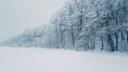

In [ ]:
from PIL import Image
import os
from IPython.display import Image as IPImage, display

# Path to your original image
image_path = '/content/pexels_winter/1003124.jpg'  # Change to your image path

print(f"Opening image: {image_path}")

try:
    # Open the original image
    with Image.open(image_path) as img:
        print(f"Original image size: {img.size}")

        # Resize while maintaining aspect ratio (thumbnail max size 128x128)
        img.thumbnail((128, 128))

        print(f"Thumbnail size: {img.size}")

        # Prepare save folder and path
        thumbnail_folder = 'images'
        os.makedirs(thumbnail_folder, exist_ok=True)
        thumbnail_path = os.path.join(thumbnail_folder, 'winter_thumb.jpg')

        # Save thumbnail
        img.save(thumbnail_path)
        print(f"Thumbnail saved to {thumbnail_path}")

except Exception as e:
    print(f"Error processing image: {e}")

# Display the saved thumbnail (works in Jupyter/Colab)
if os.path.exists(thumbnail_path):
    display(IPImage(filename=thumbnail_path))
else:
    print("Thumbnail file not found to display.")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from pathlib import Path

seasons = ("winter", "summer", "spring", "fall")
path = Path("seasons")

if not path.exists():
    path.mkdir()

for season in seasons:
    dest = path / season
    dest.mkdir(exist_ok=True)


In [ ]:
import shutil
from pathlib import Path

# Folder where your Pexels images are downloaded
pexels_images_folder = Path("./pexels_winter")

# Main animals folder
seasons_folder = Path("seasons")

# Destination folder for dogs
winter_folder = seasons_folder / "winter"

# Create folders if they don't exist
winter_folder.mkdir(parents=True, exist_ok=True)

# Move all images from pexels_dogs/ to animals/dogs/
for image_path in pexels_images_folder.iterdir():
    if image_path.is_file() and image_path.suffix.lower() in ['.jpg', '.jpeg', '.png', '.webp']:
        dest_path = winter_folder / image_path.name
        shutil.move(str(image_path), str(dest_path))
        print(f"Moved {image_path.name} to {dest_path}")

print("All images moved to animals/winter/")


All images moved to animals/winter/


In [ ]:
import os
import requests
from urllib.parse import urlencode
from pathlib import Path

# Your Pexels API key here
PEXELS_API_KEY = "NoQl7iJebcF5mYXFMrz9j3Ahcdx0KwJiI3ohnjSvSyHq0Tu4c4xWhtsk"

headers = {
    "Authorization": PEXELS_API_KEY
}

query = "summer"
per_page = 30   # Max 80 per request
max_images = 200

# Folder to save images
base_path = Path("seasons")
summer_folder = base_path / "summer"
summer_folder.mkdir(parents=True, exist_ok=True)

print(f"Downloading summer images to {summer_folder.resolve()}...")

image_count = 0
page = 1

while image_count < max_images:
    params = {
        "query": query,
        "per_page": per_page,
        "page": page
    }
    url = f"https://api.pexels.com/v1/search?{urlencode(params)}"
    response = requests.get(url, headers=headers)

    if response.status_code != 200:
        print(f"Error: {response.status_code} - {response.text}")
        break

    data = response.json()
    photos = data.get("photos", [])
    if not photos:
        print("No more photos found.")
        break

    for photo in photos:
        if image_count >= max_images:
            break
        image_url = photo["src"]["large"]
        image_id = photo["id"]
        save_path = summer_folder / f"{image_id}.jpg"

        img_response = requests.get(image_url)
        if img_response.status_code == 200:
            with open(save_path, "wb") as f:
                f.write(img_response.content)
            image_count += 1
            print(f"Downloaded {save_path.name}")
        else:
            print(f"Failed to download image {image_url}")

    page += 1

print(f"\nDownload complete! Total images downloaded: {image_count}")


Downloaded 1152359.jpg
Downloaded 46710.jpg
Downloaded 1426718.jpg
Downloaded 33044.jpg
Downloaded 450038.jpg
Downloaded 1032650.jpg
Downloaded 421759.jpg
Downloaded 1862695.jpg
Downloaded 386025.jpg
Downloaded 1071878.jpg
Downloaded 1089168.jpg
Downloaded 358904.jpg
Downloaded 1209611.jpg
Downloaded 1263986.jpg
Downloaded 1586795.jpg
Downloaded 457881.jpg
Downloaded 189848.jpg
Downloaded 1151282.jpg
Downloaded 1247526.jpg
Downloaded 413960.jpg
Downloaded 1170572.jpg
Downloaded 137132.jpg
Downloaded 1170594.jpg
Downloaded 1654255.jpg
Downloaded 994605.jpg
Downloaded 2303781.jpg
Downloaded 632522.jpg
Downloaded 712395.jpg
Downloaded 663337.jpg
Downloaded 1337825.jpg
Downloaded 1770310.jpg
Downloaded 1054018.jpg
Downloaded 67566.jpg
Downloaded 1049298.jpg
Downloaded 1353938.jpg
Downloaded 1550913.jpg
Downloaded 61129.jpg
Downloaded 1005417.jpg
Downloaded 1450353.jpg
Downloaded 1056497.jpg
Downloaded 268261.jpg
Downloaded 1320674.jpg
Downloaded 2647973.jpg
Downloaded 544554.jpg
Downloaded

In [ ]:
import os
import requests
from urllib.parse import urlencode
from pathlib import Path
import time

# Your Pexels API key here
PEXELS_API_KEY = "NoQl7iJebcF5mYXFMrz9j3Ahcdx0KwJiI3ohnjSvSyHq0Tu4c4xWhtsk"

headers = {
    "Authorization": PEXELS_API_KEY
}

query = "spring"
per_page = 30   # Max 80 per request
max_images = 200

# Folder to save images
base_path = Path("seasons")
spring_folder = base_path / "spring"
spring_folder.mkdir(parents=True, exist_ok=True)

print(f"Downloading spring images to {spring_folder.resolve()}...")

image_count = 0
page = 1

while image_count < max_images:
    params = {
        "query": query,
        "per_page": per_page,
        "page": page
    }
    url = f"https://api.pexels.com/v1/search?{urlencode(params)}"
    response = requests.get(url, headers=headers)

    if response.status_code != 200:
        print(f"Error: {response.status_code} - {response.text}")
        break

    data = response.json()
    photos = data.get("photos", [])
    if not photos:
        print("No more photos found.")
        break

    for photo in photos:
        if image_count >= max_images:
            break
        image_url = photo["src"]["large"]
        image_id = photo["id"]
        save_path = spring_folder / f"{image_id}.jpg"

        img_response = requests.get(image_url)
        if img_response.status_code == 200:
            with open(save_path, "wb") as f:
                f.write(img_response.content)
            image_count += 1
            print(f"Downloaded {save_path.name}")
        else:
            print(f"Failed to download image {image_url}")

        time.sleep(0.2)  # Be polite, avoid hammering the server

    page += 1

print(f"\nDownload complete! Total images downloaded: {image_count}")


Downloaded 1883385.jpg
Downloaded 414181.jpg
Downloaded 920147.jpg
Downloaded 250591.jpg
Downloaded 2099737.jpg
Downloaded 69776.jpg
Downloaded 953241.jpg
Downloaded 72473.jpg
Downloaded 159406.jpg
Downloaded 920154.jpg
Downloaded 46164.jpg
Downloaded 413707.jpg
Downloaded 1076607.jpg
Downloaded 414083.jpg
Downloaded 1009831.jpg
Downloaded 94847.jpg
Downloaded 2106037.jpg
Downloaded 612807.jpg
Downloaded 1597662.jpg
Downloaded 355663.jpg
Downloaded 371393.jpg
Downloaded 40731.jpg
Downloaded 961402.jpg
Downloaded 225203.jpg
Downloaded 72161.jpg
Downloaded 443420.jpg
Downloaded 2388650.jpg
Downloaded 1563650.jpg
Downloaded 414660.jpg
Downloaded 908308.jpg
Downloaded 2104881.jpg
Downloaded 693857.jpg
Downloaded 992734.jpg
Downloaded 247373.jpg
Downloaded 66304.jpg
Downloaded 102896.jpg
Downloaded 953075.jpg
Downloaded 2076494.jpg
Downloaded 33542.jpg
Downloaded 67857.jpg
Downloaded 262713.jpg
Downloaded 1971086.jpg
Downloaded 2115371.jpg
Downloaded 85773.jpg
Downloaded 54300.jpg
Downloade

In [ ]:
import os
import requests
from urllib.parse import urlencode
from pathlib import Path
import time

# Your Pexels API key here
PEXELS_API_KEY = "NoQl7iJebcF5mYXFMrz9j3Ahcdx0KwJiI3ohnjSvSyHq0Tu4c4xWhtsk"

headers = {
    "Authorization": PEXELS_API_KEY
}

query = "fall"
per_page = 30   # Max 80 per request
max_images = 200

# Folder to save images
base_path = Path("seasons")
fall_folder = base_path / "fall"
fall_folder.mkdir(parents=True, exist_ok=True)

print(f"Downloading fall images to {fall_folder.resolve()}...")

image_count = 0
page = 1

while image_count < max_images:
    params = {
        "query": query,
        "per_page": per_page,
        "page": page
    }
    url = f"https://api.pexels.com/v1/search?{urlencode(params)}"
    response = requests.get(url, headers=headers)

    if response.status_code != 200:
        print(f"Error: {response.status_code} - {response.text}")
        break

    data = response.json()
    photos = data.get("photos", [])
    if not photos:
        print("No more photos found.")
        break

    for photo in photos:
        if image_count >= max_images:
            break
        image_url = photo["src"]["large"]
        image_id = photo["id"]
        save_path = fall_folder / f"{image_id}.jpg"

        img_response = requests.get(image_url)
        if img_response.status_code == 200:
            with open(save_path, "wb") as f:
                f.write(img_response.content)
            image_count += 1
            print(f"Downloaded {save_path.name}")
        else:
            print(f"Failed to download image {image_url}")

        time.sleep(0.2)  # Be polite, avoid hammering the server

    page += 1

print(f"\nDownload complete! Total images downloaded: {image_count}")


Downloaded 5540035.jpg
Downloaded 5429051.jpg
Downloaded 5429056.jpg
Downloaded 5279629.jpg
Downloaded 5279632.jpg
Downloaded 5529011.jpg
Downloaded 5859262.jpg
Downloaded 1097781.jpg
Downloaded 5838858.jpg
Downloaded 5827880.jpg
Downloaded 5634773.jpg
Downloaded 5290165.jpg
Downloaded 5838883.jpg
Downloaded 5739628.jpg
Downloaded 5540165.jpg
Downloaded 3933897.jpg
Downloaded 5477855.jpg
Downloaded 2962665.jpg
Downloaded 5635233.jpg
Downloaded 5724880.jpg
Downloaded 5724875.jpg
Downloaded 5589865.jpg
Downloaded 5536030.jpg
Downloaded 5793125.jpg
Downloaded 33109.jpg
Downloaded 756903.jpg
Downloaded 1477199.jpg
Downloaded 1389460.jpg
Downloaded 235721.jpg
Downloaded 1590551.jpg
Downloaded 695207.jpg
Downloaded 235767.jpg
Downloaded 1563356.jpg
Downloaded 628233.jpg
Downloaded 1114896.jpg
Downloaded 2310641.jpg
Downloaded 688830.jpg
Downloaded 35778.jpg
Downloaded 602579.jpg
Downloaded 1545345.jpg
Downloaded 2734469.jpg
Downloaded 2734512.jpg
Downloaded 3130385.jpg
Downloaded 1496378.jpg

In [ ]:
from fastai.vision.all import get_image_files, verify_images

In [ ]:
from fastai.vision.all import get_image_files, verify_images
from pathlib import Path

base_path = Path("seasons")
seasons = ["spring", "summer", "fall", "winter"]

for season in seasons:
    folder = base_path / season
    fns = get_image_files(folder)
    failed = verify_images(fns)
    print(f"{season.capitalize()} - Number of corrupted images: {len(failed)}")


Spring - Number of corrupted images: 0
Summer - Number of corrupted images: 0
Fall - Number of corrupted images: 0
Winter - Number of corrupted images: 0


In [ ]:
from fastai.vision.all import *

seasons = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

dls = seasons.dataloaders(Path('seasons'))


In [ ]:
blocks=(ImageBlock, CategoryBlock)


In [ ]:
get_items=get_image_files


In [ ]:
splitter=RandomSplitter(valid_pct=0.2, seed=42)


In [ ]:
get_y=parent_label


In [ ]:
item_tfms=RandomResizedCrop(224, min_scale=0.5),
batch_tfms=aug_transforms()

In [ ]:
dls = seasons.dataloaders(path)


In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 199MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,2.050499,1.165122,0.472081,00:09


epoch,train_loss,valid_loss,error_rate,time
0,1.426523,1.083922,0.446701,00:07
1,1.234281,1.241787,0.482233,00:08
2,1.072303,1.264927,0.477157,00:08
3,0.945112,1.267180,0.487310,00:07


In [ ]:
learn.export()

In [ ]:
# from fastai.vision.all import load_learner

# learn_inf = load_learner('export.pkl')

# # Now you can use learn_inf to predict new images
# img_path = 'path_to_some_image.jpg'
# pred, pred_idx, probs = learn_inf.predict(img_path)

# print(f"Prediction: {pred}, Probability: {probs[pred_idx]:.4f}")
